In [1]:
import tensorflow as tf

import pandas as pd
import codecs
import numpy as np
import math
import csv
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow.keras.preprocessing
#from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Add, Multiply, Subtract
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation, BatchNormalization
# regularizers
from tensorflow.keras.layers import Conv1D, Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout, SpatialDropout1D
from scipy import signal
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pylab as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from numpy.linalg import svd
import gc
from keijzer import *
from tensorflow import keras
from keras.models import Model
from keras.layers import *
from tensorflow.keras.optimizers import Adam,SGD
from keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout, Activation, Multiply, Embedding, Layer, Reshape
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
#from keras.ops import convert_to_tensor, convert_to_numpy
#from keras.utils import plot_model
from keras import activations
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import math

class LossHistory(tensorflow.keras.callbacks.Callback):  # history = LossHistory()
    def init(self):  # history.init()
        self.losses = []
        # self.accs = []
        self.val_losses = []
        # self.val_accs = []
        self.rmses = []
        self.mses = []
        self.maes = []
        self.mapes = []
        self.val_rmses = []
        self.val_mses = []
        self.val_maes = []
        self.val_mapes = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        # self.accs.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        # self.val_accs.append(logs.get('val_accuracy
        self.rmses.append(logs.get('root_mean_squared_error'))
        self.mses.append(logs.get('mean_squared_error'))
        self.maes.append(logs.get('mean_absolute_error'))
        self.mapes.append(logs.get('mean_absolute_percentage_error'))
        self.val_rmses.append(logs.get('val_root_mean_squared_error'))
        self.val_mses.append(logs.get('val_mean_squared_error'))
        self.val_maes.append(logs.get('val_mean_absolute_error'))
        self.val_mapes.append(logs.get('val_mean_absolute_percentage_error'))



def root_squared_mean_error(y_true, y_pred):
    return K.mean((K.abs(y_pred - y_true))*K.square(y_true-K.mean(y_true)))*100

def mse_mae(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))+K.mean(K.abs(y_pred - y_true))

from keras.layers.advanced_activations import PReLU

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '0' # 여러개 사용시 '0,1,2' 식으로 하나의 문자열에 입력
gpus = tf.config.experimental.list_physical_devices('GPU') # 호스트 러나임에 표시되는 GPU 장치 목록 반환

if gpus: # 반환된 GPU 장치 목록이 있다면
    try: # 해당 장치에 대한 메모리 증가 활성화 여부 설정
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e: # try문 실패시에 에러문구 출력
        print(e)

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2020.csv'
data_source1 = pd.read_csv(data_path)
dat_source1 = pd.DataFrame(data_source1)
#dat_source1 = dat_source1.iloc[:-3,:]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2021.csv'
data_source2 = pd.read_csv(data_path)
dat_source2 = pd.DataFrame(data_source2)
dat_source2 = dat_source2.iloc[:8761,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2022.csv'
data_source3 = pd.read_csv(data_path)
dat_source3 = pd.DataFrame(data_source3)
dat_source3 = dat_source3.iloc[:8760,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2023.csv'
data_source4 = pd.read_csv(data_path)
dat_source4 = pd.DataFrame(data_source4)
dat_source4 = dat_source4.iloc[:8760,:9]

dat_arr1 = np.array(dat_source1)
dat_arr2 = np.array(dat_source2)
dat_arr3 = np.array(dat_source3)
dat_arr4 = np.array(dat_source4)

dat_arr = np.concatenate([dat_arr1, dat_arr2, dat_arr3, dat_arr4],axis=0)
dat_arr.shape # 8784, 8761, 8760, 8760

dat_source = pd.DataFrame(dat_arr, columns=['Time-Date stamp','Date','ERCOT Load','Total Wind Output','Total Wind Installed','Wind Output, % of Load','Wind Output, % of Installed','1-hr MW change','1-hr % change'])
dat_source

,Time-Date stamp,Date,ERCOT Load,Total Wind Output,Total Wind Installed,"Wind Output, % of Load","Wind Output, % of Installed",1-hr MW change,1-hr % change
0,01-01-2020 00:00:00,Jan-01,36823,12335,27040,33.5,45.617,NaN,NaN
1,01-01-2020 01:00:00,Jan-01,36511,13300,27040,36.4,49.187,965.4,7.826
2,01-01-2020 02:00:00,Jan-01,36022,13586,27040,37.7,50.245,286.2,2.152
3,01-01-2020 03:00:00,Jan-01,35790,14107,27040,39.4,52.171,520.9,3.834
4,01-01-2020 04:00:00,Jan-01,35642,14887,27040,41.8,55.055,779.6,5.527
...,...,...,...,...,...,...,...,...,...
35060,12-31-2023 20:00:00,Dec-31,44887,17161,38631,38.23,44.42,2858,19.99
35061,12-31-2023 21:00:00,Dec-31,44013,18301,38631,41.58,47.37,1139,6.64
35062,12-31-2023 22:00:00,Dec-31,43280,18607,38631,42.99,48.17,307,1.67
35063,12-31-2023 23:00:00,Dec-31,42319,17866,38631,42.22,46.25,-741,-3.98


In [4]:
dat = pd.DataFrame()
dat['MW % change'] = np.array(dat_source.iloc[1:,3], dtype=float)-np.array(dat_source.iloc[0:-1,3], dtype=float)
dat['MW % change'] = np.divide(np.array(dat['MW % change']),np.array(dat_source.iloc[1:,4]))*100
dat['Total Wind Output'] = np.divide(np.array(dat_source.iloc[1:,3]), np.array(dat_source.iloc[1:,4]))

dat

,MW % change,Total Wind Output
0,3.56879,0.491864
1,1.05769,0.502441
2,1.92678,0.521709
3,2.88462,0.550555
4,-0.580621,0.544749
...,...,...
35059,7.3982,0.444229
35060,2.951,0.473739
35061,0.79211,0.48166
35062,-1.91815,0.462478


## Figures

In [5]:
ramp_ratio = 20
load_ratio = 10
year_arr = np.concatenate([np.ones(8784)*2020, np.ones(8760)*2021, np.ones(8760)*2022, np.ones(8760)*2023])
year_df = pd.DataFrame(year_arr, columns=['Year'], dtype=int)
wind_df = pd.concat([year_df, dat], axis=1)
wind_df

,Year,MW % change,Total Wind Output
0,2020,3.56879,0.491864
1,2020,1.05769,0.502441
2,2020,1.92678,0.521709
3,2020,2.88462,0.550555
4,2020,-0.580621,0.544749
...,...,...,...
35059,2023,7.3982,0.444229
35060,2023,2.951,0.473739
35061,2023,0.79211,0.48166
35062,2023,-1.91815,0.462478


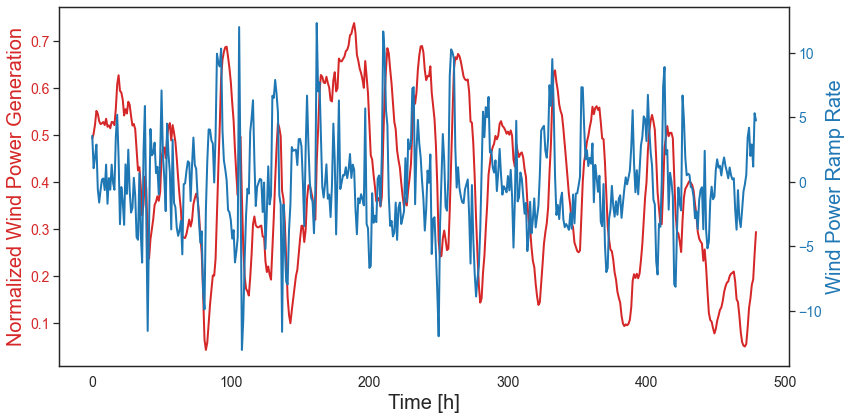

In [6]:
sns.set_theme(style="white")

fig, ax1 = plt.subplots(figsize=(12, 6))
plt.tick_params(axis='x', labelsize=14)

color = 'tab:red'
ax1.set_xlabel('Time [h]', fontsize=20)
ax1.set_ylabel('Normalized Wind Power Generation', color=color, fontsize=20)
ax1.plot(wind_df['Total Wind Output'][:480], linewidth=2, label='Wind Power Generation', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=14)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_xlabel('Time [h]', fontsize=20)
ax2.set_ylabel('Wind Power Ramp Rate', color=color, fontsize=20)
ax2.plot(wind_df['MW % change'][:480], linewidth=2, label='Wind Power Ramp Rate', color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=14)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
#fig.savefig('Gen_vs_Ramp_signal.png', dpi=1000, bbox_inches="tight")

In [6]:
#from tensorflow.keras.layers import preprocessing
#from tensorflow.keras import preprocessing
import sklearn

wind_df = wind_df.reset_index(drop=True)
#std_scaler = sklearn.preprocessing.StandardScaler()
#std_scaler_load = sklearn.preprocessing.StandardScaler()
#std_scaler_ramp = sklearn.preprocessing.StandardScaler()

std_scaler = sklearn.preprocessing.MinMaxScaler()
std_scaler_load = sklearn.preprocessing.MinMaxScaler()
std_scaler_ramp = sklearn.preprocessing.MinMaxScaler()

wind_df[['Total Wind Output']] = std_scaler.fit_transform(wind_df[['Total Wind Output']])
wind_df[['MW % change']] = std_scaler_ramp.fit_transform(wind_df[['MW % change']])
#wind_df[['Wind Change, % of Load', 'Wind Change']] = std_scaler_ramp.fit_transform(wind_df[['Wind Change, % of Load', 'Wind Change']])
wind_df = wind_df.iloc[:-1,:]
wind_df

,Year,MW % change,Total Wind Output
0,2020,0.620197,0.644724
1,2020,0.544580,0.658617
2,2020,0.570751,0.683924
3,2020,0.599594,0.721813
4,2020,0.495246,0.714187
...,...,...,...
35058,2023,0.774643,0.484984
35059,2023,0.735512,0.582157
35060,2023,0.601593,0.620917
35061,2023,0.536583,0.631322


In [7]:
ramp_df = pd.DataFrame(wind_df)
ramp_df.columns=['Year', 'Wind Change', 'Wind Output']
ramp_df

,Year,Wind Change,Wind Output
0,2020,0.620197,0.644724
1,2020,0.544580,0.658617
2,2020,0.570751,0.683924
3,2020,0.599594,0.721813
4,2020,0.495246,0.714187
...,...,...,...
35058,2023,0.774643,0.484984
35059,2023,0.735512,0.582157
35060,2023,0.601593,0.620917
35061,2023,0.536583,0.631322


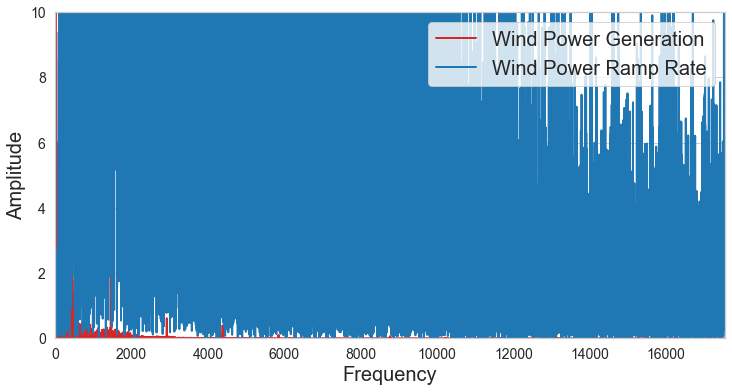

In [7]:
signal = np.fft.fft(ramp_df['Wind Output'])
signal = signal ** 2 / len(signal)

signal2 = np.fft.fft(ramp_df['Wind Change'])
signal2 = signal2 ** 2 / len(signal2)

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 6))
plt.plot(abs(signal), linewidth=2, label='Wind Power Generation', color='tab:red')
plt.plot(abs(signal2), linewidth=2, label='Wind Power Ramp', color='tab:blue')
plt.xlabel('Frequency', fontsize=20)
plt.xlim(0, int(len(signal)/2))
plt.ylabel('Amplitude', fontsize=20)
plt.ylim(0, 10)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(labels=['Wind Power Generation', 'Wind Power Ramp Rate'], loc="upper right", fontsize=20)
plt.show()
#f.savefig('Gen_vs_Ramp_FFT.png', dpi=1000, bbox_inches="tight")

## Common Definitions

In [8]:
def create_dataset(dataset, timesteps, output_timesteps, leadtime):
    dataX, dataY = [], []
    for i in range(len(dataset) - timesteps -output_timesteps - leadtime - 1):
        a = dataset[i:(i + timesteps), :]
        dataX.append(a)
        dataY.append(dataset[(i + timesteps + leadtime):(i+timesteps+output_timesteps+leadtime), :])
    return np.array(dataX), np.array(dataY)

def svdadd(X, start, end, b_size):
    dec_x = X[start:end, :, :]
    U, S, Vh = svd(dec_x.reshape(b_size, -1), full_matrices=True)

    high_sig = np.matmul(np.matmul(U[:,:high_ind], np.diag(S[0:high_ind])), Vh[:high_ind,:])
    low_sig = X[:dec_num, :, :].reshape(b_size,-1)-high_sig

    rec_x = np.zeros((b_size, b_size, high_ind))
    
    for i in range(high_ind):
        rec_x[:,:,i] = np.matmul((U[:,i]*S[i]).reshape(-1,1), Vh[i,:].reshape(1,-1))    
    return rec_x, low_sig

## Wind Generation Forecasting

In [9]:
norm_df = np.array(wind_df.iloc[:,2]).reshape(-1,1)
timesteps = 24*7
output_timesteps = 24
leadtime = 6
num_features = 1
X, Y = create_dataset(norm_df, timesteps, output_timesteps, leadtime)
b_size = timesteps

In [10]:
dec_num = timesteps
high_ind = 35

addX = np.zeros((X.shape[0], dec_num, high_ind+1))

for k in range(X.shape[0]//dec_num):
    rec_x, low_sig = svdadd(X, k*dec_num, (k+1)*dec_num, b_size)
    addX[k*dec_num:k*dec_num+dec_num,:, :-1] = rec_x
    addX[k*dec_num:k*dec_num+dec_num,:, -1] = low_sig
    
rec_x, low_sig = svdadd(X, X.shape[0]-dec_num, X.shape[0], b_size)
addX[X.shape[0]-dec_num:X.shape[0], :, :-1] = rec_x
addX[X.shape[0]-dec_num:X.shape[0],:, -1] = low_sig

addX_det = addX[:, :, :-1]
addX_det = np.sum(addX_det, axis=2)
X = np.concatenate([X, addX], axis=2)
num_features = X.shape[2]

In [11]:
a = np.zeros((168, 37))
for i in range(X.shape[2]):
    a[:,i] = std_scaler.inverse_transform(X[0,:,i].reshape(-1,1)).reshape(-1)

### Figures

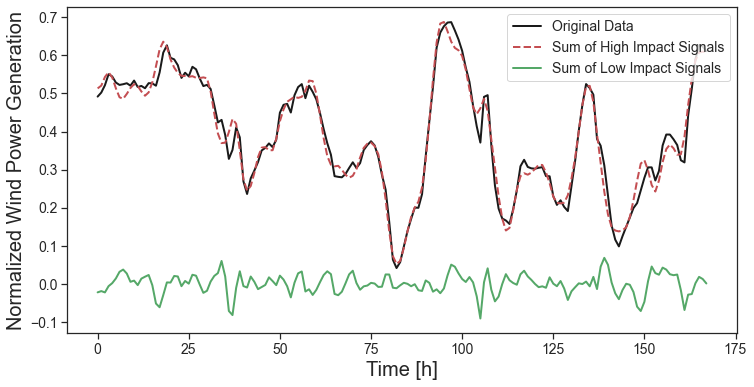

In [15]:
sns.set_theme(style="ticks")
#sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(12, 6))

plt.rcParams.update({'font.size': 100})
plt.plot(a[:,0], 'k', linewidth=2, label='Original Data')
plt.plot(a[:,0]-a[:,36], 'r--', linewidth=2, label='Sum of High Impact Signals')
plt.plot(a[:,36], 'g', linewidth=2, label='Sum of Low Impact Signals')

plt.legend(loc=1, fontsize=14)
plt.xlabel('Time [h]', fontsize=20)
plt.ylabel('Normalized Wind Power Generation', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
#f.savefig('Decomposed_Data.png', dpi=1000, bbox_inches="tight")
#f.savefig('Decomposed_Data.eps', dpi=1000, bbox_inches="tight")

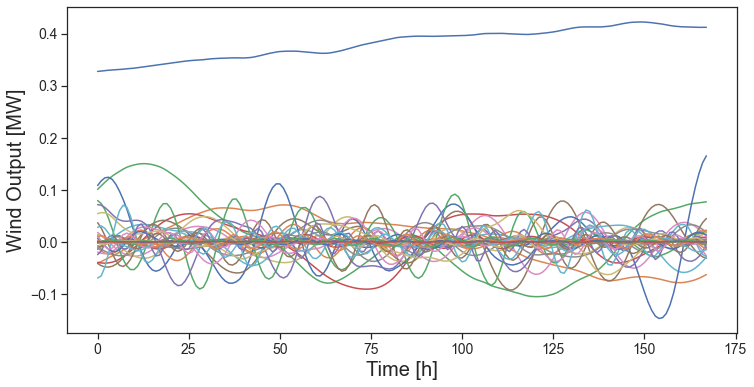

In [16]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(12, 6))
for i in range(1,35):
    plt.plot(a[:,i])
plt.xlabel('Time [h]', fontsize=20)
plt.ylabel('Wind Output [MW]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
#f.savefig('Decomposed_Data2.png', dpi=1000, bbox_inches="tight")
#f.savefig('Decomposed_Data2.eps', dpi=1000, bbox_inches="tight")

In [18]:
Xf, Yf = create_dataset(norm_df, timesteps, output_timesteps, leadtime)

dec_x = Xf[0:168, :, :]
U, S, Vh = svd(dec_x.reshape(b_size, -1), full_matrices=True)
x = np.arange(168)
sumS = 0
sumlist = []
for i in range(S.shape[0]):
    sumS += S[i]/sum(S)
    sumlist.append(sumS)

[]

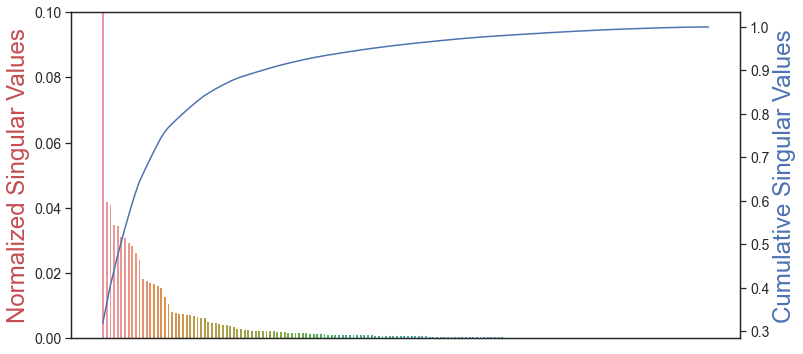

In [19]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()

ax1 = sns.barplot(x, S/sum(S), ax=ax1)
ax2 = sns.lineplot(x, np.array(sumlist), ax=ax2, linewidth=1.5)

ax1.set_ylabel('Normalized Singular Values', color='r', fontsize = "24")
ax2.set_ylabel('Cumulative Singular Values', color='b', fontsize = "24")

ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax1.set_ylim(0, 0.1)

ax1.set_xticks([])
ax2.set_xticks([])

#fig.savefig('Singular_Value.png', dpi=1000, bbox_inches="tight")
#fig.savefig('Singular_Value.eps', dpi=1000, bbox_inches="tight")

## Load and Test Pre-trained Basic Model

In [12]:
def MAEMS(y_true, y_pred):
    return K.mean((K.abs(y_pred - y_true))*K.square(y_true))*100

from keras.layers.advanced_activations import PReLU

In [13]:
trvaX, teX, trvaY, teY = train_test_split(X, Y, test_size=0.1, shuffle=False)

idx = np.arange(trvaX.shape[0])
np.random.shuffle(idx)
strvaX = trvaX[idx]
strvaY = trvaY[idx]
strvaY = strvaY.reshape(-1, output_timesteps)

trvaY = trvaY.reshape(-1, output_timesteps)
teY = teY.reshape(-1, output_timesteps)

strX, svaX, strY, svaY = train_test_split(strvaX, strvaY, test_size=0.3, shuffle=False)
trX, vaX, trY, vaY = train_test_split(trvaX, trvaY, test_size=0.3, shuffle=False)

trvaX.shape, trvaY.shape, teX.shape, teY.shape

((31377, 168, 37), (31377, 24), (3487, 168, 37), (3487, 24))

In [14]:
with tf.device('/gpu:0'):
    wind_model = keras.models.load_model('Basic Model Final_lead.h5', custom_objects={'MAEMS': MAEMS})
    winder_model = keras.models.load_model('Error Learning Model_lead.h5', custom_objects={'mse_mae': mse_mae})
    gc.collect()
    trainPredict = wind_model.predict(trvaX, batch_size=b_size)
    testPredict = wind_model.predict(teX, batch_size=b_size)

In [15]:
def npMAEMS(y_true, y_pred):
    return np.mean((abs(y_pred - y_true))*np.square(y_true))*100
def npMAEMD(y_true, y_pred):
    return np.mean((abs(y_pred - y_true))*np.square(y_true-np.mean(y_true)))*100
def npMSE(y_true, y_pred):
    return np.mean(np.square(-y_true+y_pred))
def npMAE(y_true, y_pred):
    return np.mean(abs(-y_true+y_pred))

In [16]:
travaY = trvaY.reshape(-1)
trPredict = trainPredict.reshape(-1)
testY = teY.reshape(-1)
tePredict = testPredict.reshape(-1)

In [17]:
print('Error Test Score > MSE == ', npMSE(testY, tePredict), ' MAE == ', npMAE(testY, tePredict), ' MAEMS == ', npMAEMS(testY, tePredict))

Error Test Score > MSE ==  0.032836721856768156  MAE ==  0.14583632600714025  MAEMS ==  2.3040104722921315


In [18]:
errors = trainPredict - trvaY
prediction = trainPredict

In [19]:
norm_df2 = pd.DataFrame(norm_df).iloc[timesteps:trvaX.shape[0]+timesteps, :]
norm_df2.columns = ['Normalized Wind']
norm_df2 = norm_df2.reset_index(drop=True)
norm_df2.shape

(31377, 1)

## Load and Test Pre-trained FFEL Model

In [20]:
Prindex = ['Prediction1', 'Prediction2','Prediction3','Prediction4','Prediction5','Prediction6','Prediction7','Prediction8','Prediction9','Prediction10','Prediction11','Prediction12','Prediction13', 'Prediction14','Prediction15','Prediction16','Prediction17','Prediction18','Prediction19','Prediction20','Prediction21','Prediction22','Prediction23','Prediction24']
Erindex = ['Error1', 'Error2','Error3','Error4','Error5','Error6','Error7','Error8','Error9','Error10','Error11','Error12','Error13', 'Error14','Error15','Error16','Error17','Error18','Error19','Error20','Error21','Error22','Error23','Error24']

pr_df = pd.DataFrame(prediction, columns=Prindex)
er_df = pd.DataFrame(errors, columns=Erindex)
norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2

,Normalized Wind,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,...,Error15,Error16,Error17,Error18,Error19,Error20,Error21,Error22,Error23,Error24
0,0.799339,0.793821,0.778579,0.782684,0.784334,0.817920,0.830460,0.840056,0.855320,0.861071,...,-0.046370,-0.059384,-0.030708,0.002553,0.006360,0.010906,-0.006251,0.033813,0.013871,-0.062462
1,0.817166,0.798684,0.780725,0.787723,0.791635,0.821870,0.838346,0.849698,0.871606,0.880321,...,-0.053492,-0.039978,0.016226,0.008415,0.026793,0.027830,0.019322,0.070088,-0.056586,-0.021784
2,0.800019,0.792277,0.779091,0.787298,0.792744,0.814910,0.836805,0.848949,0.878115,0.887301,...,-0.045731,-0.013242,-0.003927,0.002166,0.013408,0.024412,0.026133,-0.021612,-0.037275,-0.004287
3,0.787147,0.790341,0.778690,0.785007,0.795453,0.804934,0.831996,0.848054,0.879172,0.890917,...,-0.024629,-0.034241,-0.019743,-0.013708,0.001953,0.022814,-0.082541,-0.025631,-0.049618,0.010504
4,0.751347,0.799934,0.785896,0.788972,0.799467,0.801704,0.826851,0.842497,0.865963,0.877197,...,-0.048506,-0.049251,-0.038292,-0.020060,-0.000687,-0.084857,-0.085209,-0.042470,-0.034387,0.012258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31372,0.472558,0.335937,0.295604,0.268762,0.260960,0.260939,0.286097,0.309418,0.357131,0.409120,...,0.157322,0.163418,0.041974,-0.028258,-0.016669,-0.016345,-0.033250,-0.001331,0.010003,0.090508
31373,0.452303,0.269700,0.241362,0.232971,0.242347,0.264628,0.310137,0.355011,0.416972,0.472364,...,0.169223,0.052733,-0.016557,-0.017758,-0.015608,-0.028548,0.008750,0.020938,0.093514,0.178777
31374,0.462762,0.243936,0.230544,0.241394,0.263679,0.300760,0.358665,0.412359,0.483278,0.536601,...,0.060044,0.000273,-0.003040,-0.018813,-0.022580,0.019655,0.032958,0.099603,0.176425,0.230216
31375,0.455859,0.266681,0.257581,0.278581,0.309854,0.349955,0.410589,0.468384,0.535940,0.585311,...,0.004171,0.015002,-0.004699,-0.034692,0.020979,0.038457,0.103309,0.169840,0.210980,0.232827


In [21]:
norm_df2 = np.array(norm_df2)
output_timesteps = 1
Xe, Ye = create_dataset(norm_df2, timesteps, output_timesteps, 0)
Xe.shape

(31207, 168, 49)

In [22]:
trvaXe = Xe
trvaYe = Ye[:,:,-24:].reshape(-1,24)

In [23]:
gc.collect()

4180

In [24]:
with tf.device('/gpu:0'):
    trainerPredict = winder_model.predict(trvaXe, batch_size=b_size)

In [25]:
addtrainPredict = trainPredict[timesteps:-2,:]-trainerPredict
#addtestPredict = testPredict[timesteps:-2,:]-testerPredict

In [26]:
errors = testPredict - teY
prediction = testPredict

norm_df2 = pd.DataFrame(norm_df).iloc[trvaX.shape[0]+timesteps:trvaX.shape[0]+timesteps+teY.shape[0], :]
norm_df2.columns = ['Normalized Wind']
norm_df2 = norm_df2.reset_index(drop=True)

Prindex = ['Prediction1', 'Prediction2','Prediction3','Prediction4','Prediction5','Prediction6','Prediction7','Prediction8','Prediction9','Prediction10','Prediction11','Prediction12','Prediction13', 'Prediction14','Prediction15','Prediction16','Prediction17','Prediction18','Prediction19','Prediction20','Prediction21','Prediction22','Prediction23','Prediction24']
Erindex = ['Error1', 'Error2','Error3','Error4','Error5','Error6','Error7','Error8','Error9','Error10','Error11','Error12','Error13', 'Error14','Error15','Error16','Error17','Error18','Error19','Error20','Error21','Error22','Error23','Error24']

pr_df = pd.DataFrame(prediction, columns=Prindex)
er_df = pd.DataFrame(errors, columns=Erindex)

norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2 = np.array(norm_df2)
output_timesteps = 1
Xe, Ye = create_dataset(norm_df2, timesteps, output_timesteps,0)
teXe = Xe
teYe = Ye[:,:,-24:].reshape(-1,24)

In [27]:
with tf.device('/gpu:0'):
    #trainerPredict = winder_model.predict(trvaXe, batch_size=b_size)
    testerPredict = winder_model.predict(teXe, batch_size=b_size)

In [28]:
#addtrainPredict = trainPredict[timesteps:-2,:]-trainerPredict
addtestPredict = testPredict[timesteps:-2,:]-testerPredict

In [29]:
print('Error Train Score > MSE == ', (np.mean(np.square(trvaY[timesteps:-2,:]-trainPredict[timesteps:-2,:]))), ' MAE == ', mean_absolute_error(trvaY[timesteps:-2,:], trainPredict[timesteps:-2,:]), ' MAPE == ', mean_absolute_percentage_error(trvaY[timesteps:-2,:], trainPredict[timesteps:-2,:]), )
print('Error Train Score > MSE == ', (np.mean(np.square(trvaY[timesteps:-2,:]-addtrainPredict))), ' MAE == ', mean_absolute_error(trvaY[timesteps:-2,:], addtrainPredict), ' MAPE == ', mean_absolute_percentage_error(trvaY[timesteps:-2,:], addtrainPredict))
print('Error Test Score > MSE == ', (np.mean(np.square(teY[timesteps:-2,:]-testPredict[timesteps:-2,:]))), ' MAE == ', mean_absolute_error(teY[timesteps:-2,:], testPredict[timesteps:-2,:]), ' MAPE == ', mean_absolute_percentage_error(teY[timesteps:-2,:], testPredict[timesteps:-2,:]), ' MAEMS == ', np.mean((abs(testPredict[timesteps:-2,:] - teY[timesteps:-2,:]))*np.square(teY[timesteps:-2,:]))*100)
print('Error Test Score > MSE == ', (np.mean(np.square(teY[timesteps:-2,:]-addtestPredict))), ' MAE == ', mean_absolute_error(teY[timesteps:-2,:], addtestPredict), ' MAPE == ', mean_absolute_percentage_error(teY[timesteps:-2,:], addtestPredict), ' MAEMS == ', np.mean((abs(addtestPredict - teY[timesteps:-2,:]))*np.square(teY[timesteps:-2,:]))*100)

Error Train Score > MSE ==  0.010749875384355328  MAE ==  0.06935735381460215  MAPE ==  inf
Error Train Score > MSE ==  0.0003086455585089063  MAE ==  0.012880756208074098  MAPE ==  inf
Error Test Score > MSE ==  0.03357277990633022  MAE ==  0.14762110707082812  MAPE ==  88.33739268989889  MAEMS ==  2.2632173626713428
Error Test Score > MSE ==  0.0010769692992615974  MAE ==  0.024615836419590646  MAPE ==  10.877117884450543  MAEMS ==  0.5133157600707814


In [30]:
result_tr = np.concatenate([addtrainPredict.reshape(-1,1), trvaY[timesteps:-2,:].reshape(-1,1), trvaY[timesteps:-2,:].reshape(-1,1)-addtrainPredict.reshape(-1,1), trainPredict[timesteps:-2,:].reshape(-1,1)], axis=1)
result_te = np.concatenate([addtestPredict.reshape(-1,1), teY[timesteps:-2,:].reshape(-1,1), teY[timesteps:-2,:].reshape(-1,1)-addtestPredict.reshape(-1,1), testPredict[timesteps:-2,:].reshape(-1,1)], axis=1)

result_tr_df = pd.DataFrame(result_tr, columns=['Predicted Value','Real Value','Forecasting Error', 'Initial Predicted Value'])
result_te_df = pd.DataFrame(result_te, columns=['Predicted Value','Real Value','Forecasting Error', 'Initial Predicted Value'])

In [31]:
teY[timesteps:-2,:].reshape(-1,1).shape, addtestPredict.reshape(-1,1).shape

((79608, 1), (79608, 1))

In [32]:
result_te_df

,Predicted Value,Real Value,Forecasting Error,Initial Predicted Value
0,0.503680,0.461890,-0.041790,0.477568
1,0.538970,0.508118,-0.030852,0.475799
2,0.624355,0.560342,-0.064013,0.473172
3,0.639209,0.597191,-0.042018,0.477669
4,0.597050,0.557622,-0.039427,0.493358
...,...,...,...,...
79603,0.285722,0.293595,0.007873,0.662631
79604,0.319712,0.311174,-0.008538,0.637145
79605,0.363822,0.341026,-0.022796,0.626954
79606,0.403398,0.370742,-0.032656,0.573104


In [33]:
error_tr_FFEL = trvaY[timesteps:-2,:].reshape(-1,1)-addtrainPredict.reshape(-1,1)
error_tr_basic = trvaY[timesteps:-2,:].reshape(-1,1)-trainPredict[timesteps:-2,:].reshape(-1,1)
error_te_FFEL = teY[timesteps:-2,:].reshape(-1,1)-addtestPredict.reshape(-1,1)
error_te_basic = teY[timesteps:-2,:].reshape(-1,1)-testPredict[timesteps:-2,:].reshape(-1,1)

In [34]:
np.mean(error_tr_FFEL), np.var(error_tr_FFEL), np.mean(error_tr_basic), np.var(error_tr_basic), np.mean(error_te_FFEL),np.var(error_te_FFEL), np.mean(error_te_basic), np.var(error_te_basic)

(0.0019457439011151476,
 0.00030485963918017953,
 -0.03626223806503996,
 0.009434925474869692,
 0.008769010659140269,
 0.0010000737513214816,
 -0.07027298095236871,
 0.028634488054398242)

In [35]:
result_tr_df.to_csv('training_result_dflead.csv')
result_te_df.to_csv('test_result_dflead.csv')

# Ramp Rate Forecasting

In [36]:
norm_df = np.array(wind_df.iloc[:,1]).reshape(-1,1)
timesteps = 24*7
output_timesteps = 24
num_features = 1
X, Y = create_dataset(norm_df, timesteps, output_timesteps, leadtime)
b_size = timesteps

In [37]:
X.shape, Y.shape

((34864, 168, 1), (34864, 24, 1))

In [38]:
dec_num = timesteps
high_ind = 35

addX = np.zeros((X.shape[0], dec_num, high_ind+1))

for k in range(X.shape[0]//dec_num):
    rec_x, low_sig = svdadd(X, k*dec_num, (k+1)*dec_num, b_size)
    addX[k*dec_num:k*dec_num+dec_num,:, :-1] = rec_x
    addX[k*dec_num:k*dec_num+dec_num,:, -1] = low_sig
    
rec_x, low_sig = svdadd(X, X.shape[0]-dec_num, X.shape[0], b_size)
addX[X.shape[0]-dec_num:X.shape[0], :, :-1] = rec_x
addX[X.shape[0]-dec_num:X.shape[0],:, -1] = low_sig

addX_det = addX[:, :, :-1]
addX_det = np.sum(addX_det, axis=2)
X = np.concatenate([X, addX], axis=2)
num_features = X.shape[2]

### Figures

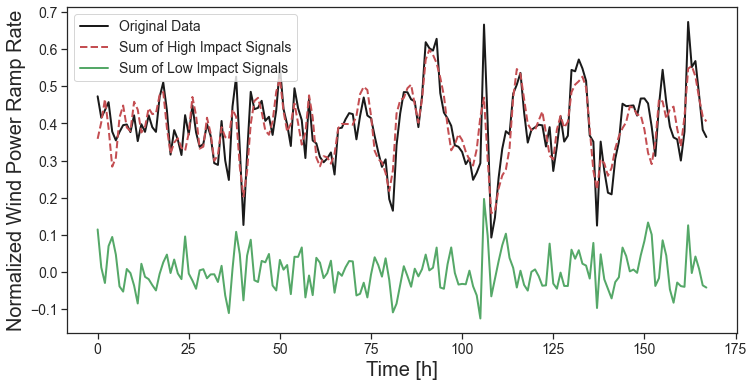

In [40]:
a = np.zeros((168, 37))

for i in range(X.shape[2]):
    a[:,i] = std_scaler.inverse_transform(X[0,:,i].reshape(-1,1)).reshape(-1)
    
sns.set_theme(style="ticks")
#sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(12, 6))

plt.rcParams.update({'font.size': 100})
plt.plot(a[:,0], 'k', linewidth=2, label='Original Data')
plt.plot(a[:,0]-a[:,36], 'r--', linewidth=2, label='Sum of High Impact Signals')
plt.plot(a[:,36], 'g', linewidth=2, label='Sum of Low Impact Signals')

plt.legend(loc="upper left", fontsize=14)
plt.xlabel('Time [h]', fontsize=20)
plt.ylabel('Normalized Wind Power Ramp Rate', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
f.savefig('Ramp Decomposed_Data.png', dpi=1000, bbox_inches="tight")
#f.savefig('Decomposed_Data.eps', dpi=1000, bbox_inches="tight")

In [44]:
X, Y = create_dataset(norm_df, timesteps, output_timesteps)

dec_x = X[0:168, :, :]
U, S, Vh = svd(dec_x.reshape(b_size, -1), full_matrices=True)

sumS = 0
sumlist = []
for i in range(S.shape[0]):
    sumS += S[i]/sum(S)
    sumlist.append(sumS)

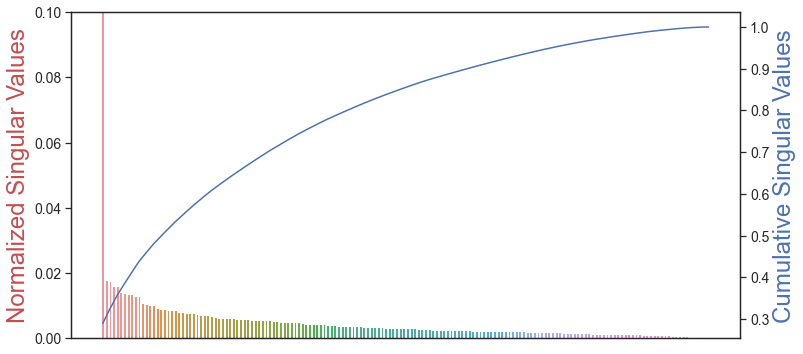

In [45]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()

ax1 = sns.barplot(x, S/sum(S), ax=ax1)
ax2 = sns.lineplot(x, np.array(sumlist), ax=ax2, linewidth=1.5)

ax1.set_ylabel('Normalized Singular Values', color='r', fontsize = "24")
ax2.set_ylabel('Cumulative Singular Values', color='b', fontsize = "24")

ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax1.set_ylim(0, 0.1)

ax1.set_xticks([])
ax2.set_xticks([])

fig.savefig('Ramp Singular_Value.png', dpi=1000, bbox_inches="tight")
#fig.savefig('Singular_Value.eps', dpi=1000, bbox_inches="tight")

## Load and Test Pre-trained Basic Model

In [39]:
trvaX, teX, trvaY, teY = train_test_split(X, Y, test_size=0.1, shuffle=False)
trvaY = trvaY.reshape(-1,output_timesteps)
teY = teY.reshape(-1,output_timesteps)
trvaX.shape, trvaY.shape, teX.shape, teY.shape

((31377, 168, 37), (31377, 24), (3487, 168, 37), (3487, 24))

In [40]:
gc.collect()

4187

In [41]:
def MAEMD(y_true, y_pred):
    return K.mean((K.abs(y_pred - y_true))*K.square(y_true-K.mean(y_true)))*100

In [42]:
with tf.device('/gpu:0'):
    ramp_model = keras.models.load_model('Basic Ramp Model Final_lead.h5', custom_objects={'MAEMD': MAEMD})
    ramper_model = keras.models.load_model('Error Learning Ramp Model_lead.h5', custom_objects={'mse_mae': mse_mae})
    gc.collect()
    trainPredict = ramp_model.predict(trvaX, batch_size=b_size)
    testPredict = ramp_model.predict(teX, batch_size=b_size)

In [43]:
def npMAEMS(y_true, y_pred):
    return np.mean((abs(y_pred - y_true))*np.square(y_true))*100
def npMAEMD(y_true, y_pred):
    return np.mean((abs(y_pred - y_true))*np.square(y_true-np.mean(y_true)))*100
def npMSE(y_true, y_pred):
    return np.mean(np.square(-y_true+y_pred))
def npMAE(y_true, y_pred):
    return np.mean(abs(-y_true+y_pred))

In [44]:
errors = trainPredict - trvaY
prediction = trainPredict

In [45]:
norm_df2 = pd.DataFrame(norm_df).iloc[timesteps:trvaX.shape[0]+timesteps, :]
norm_df2.columns = ['Normalized Wind']
norm_df2 = norm_df2.reset_index(drop=True)
norm_df2.shape

(31377, 1)

## Load and Test Pre-trained FFEL Model

In [46]:
Prindex = ['Prediction1', 'Prediction2','Prediction3','Prediction4','Prediction5','Prediction6','Prediction7','Prediction8','Prediction9','Prediction10','Prediction11','Prediction12','Prediction13', 'Prediction14','Prediction15','Prediction16','Prediction17','Prediction18','Prediction19','Prediction20','Prediction21','Prediction22','Prediction23','Prediction24']
Erindex = ['Error1', 'Error2','Error3','Error4','Error5','Error6','Error7','Error8','Error9','Error10','Error11','Error12','Error13', 'Error14','Error15','Error16','Error17','Error18','Error19','Error20','Error21','Error22','Error23','Error24']

pr_df = pd.DataFrame(prediction, columns=Prindex)
er_df = pd.DataFrame(errors, columns=Erindex)
norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2

,Normalized Wind,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,...,Error15,Error16,Error17,Error18,Error19,Error20,Error21,Error22,Error23,Error24
0,0.508387,0.444676,0.436860,0.302638,0.297785,0.421782,0.451090,0.508404,0.556098,0.610513,...,0.131257,-0.015420,0.080290,0.090538,-0.044515,-0.054864,-0.051649,-0.003791,-0.024128,-0.300063
1,0.553601,0.393561,0.369371,0.341190,0.454414,0.465517,0.417204,0.480796,0.600435,0.554215,...,0.039554,0.059712,0.074397,-0.022634,-0.019984,-0.002190,-0.049268,-0.052539,-0.286953,0.001715
2,0.473418,0.281735,0.346389,0.429335,0.435216,0.366630,0.436345,0.543661,0.533085,0.459744,...,0.119751,0.032941,-0.085894,-0.006822,-0.038579,-0.039807,-0.086606,-0.312500,-0.039378,-0.060564
3,0.483218,0.273427,0.444346,0.433547,0.422055,0.460161,0.555514,0.524731,0.452719,0.558419,...,0.117590,-0.113319,-0.129086,-0.048202,0.018464,-0.011743,-0.280403,0.008370,-0.017226,-0.042915
4,0.430654,0.319735,0.396001,0.406660,0.442480,0.450828,0.488388,0.501562,0.536546,0.686988,...,-0.103231,-0.115373,-0.114354,-0.092398,-0.127399,-0.326964,-0.046130,-0.044482,-0.066084,-0.059237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31372,0.337692,0.179432,0.186400,0.283756,0.466718,0.550215,0.626457,0.742539,0.753185,0.771121,...,0.133218,-0.041549,-0.343795,-0.245338,-0.131787,-0.185393,-0.361092,-0.238903,-0.137608,0.050349
31373,0.466293,0.248527,0.388267,0.484408,0.582086,0.607232,0.743621,0.720474,0.596254,0.684116,...,-0.035617,-0.371152,-0.217905,-0.037298,-0.155057,-0.279670,-0.200410,-0.132426,-0.026113,-0.080007
31374,0.536708,0.382436,0.548531,0.568935,0.627955,0.673685,0.744356,0.625724,0.633339,0.764129,...,-0.232766,-0.211318,-0.074034,-0.185219,-0.255915,-0.197037,-0.129930,0.023370,-0.004205,-0.127974
31375,0.496905,0.479252,0.603519,0.582363,0.605877,0.628811,0.653491,0.664704,0.711578,0.780092,...,-0.205885,-0.042554,-0.153929,-0.284508,-0.147221,-0.049204,0.004837,-0.019855,-0.114613,-0.076378


In [47]:
norm_df2 = np.array(norm_df2)
output_timesteps = 1
Xe, Ye = create_dataset(norm_df2, timesteps, output_timesteps,0)
Xe.shape

(31207, 168, 49)

In [48]:
trvaXe = Xe
trvaYe = Ye[:,:,-24:].reshape(-1,24)

In [49]:
gc.collect()

4187

In [50]:
with tf.device('/gpu:0'):
    trainerPredict = ramper_model.predict(trvaXe, batch_size=b_size)

In [51]:
addtrainPredict = trainPredict[timesteps:-2,:]-trainerPredict
#addtestPredict = testPredict[timesteps:-2,:]-testerPredict

In [52]:
errors = testPredict - teY
prediction = testPredict

norm_df2 = pd.DataFrame(norm_df).iloc[trvaX.shape[0]+timesteps:trvaX.shape[0]+timesteps+teY.shape[0], :]
norm_df2.columns = ['Normalized Wind']
norm_df2 = norm_df2.reset_index(drop=True)

Prindex = ['Prediction1', 'Prediction2','Prediction3','Prediction4','Prediction5','Prediction6','Prediction7','Prediction8','Prediction9','Prediction10','Prediction11','Prediction12','Prediction13', 'Prediction14','Prediction15','Prediction16','Prediction17','Prediction18','Prediction19','Prediction20','Prediction21','Prediction22','Prediction23','Prediction24']
Erindex = ['Error1', 'Error2','Error3','Error4','Error5','Error6','Error7','Error8','Error9','Error10','Error11','Error12','Error13', 'Error14','Error15','Error16','Error17','Error18','Error19','Error20','Error21','Error22','Error23','Error24']

pr_df = pd.DataFrame(prediction, columns=Prindex)
er_df = pd.DataFrame(errors, columns=Erindex)

norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2 = np.array(norm_df2)
output_timesteps = 1
Xe, Ye = create_dataset(norm_df2, timesteps, output_timesteps,0)
teXe = Xe
teYe = Ye[:,:,-24:].reshape(-1,24)

In [53]:
gc.collect()

2096

In [54]:
with tf.device('/gpu:0'):
    #trainerPredict = winder_model.predict(trvaXe, batch_size=b_size)
    testerPredict = ramper_model.predict(teXe, batch_size=b_size)

In [55]:
#addtrainPredict = trainPredict[timesteps:-2,:]-trainerPredict
addtestPredict = testPredict[timesteps:-2,:]-testerPredict

In [56]:
print('Error Train Score > MSE == ', (np.mean(np.square(trvaY[timesteps:-2,:]-trainPredict[timesteps:-2,:]))), ' MAE == ', mean_absolute_error(trvaY[timesteps:-2,:], trainPredict[timesteps:-2,:]), ' MAPE == ', mean_absolute_percentage_error(trvaY[timesteps:-2,:], trainPredict[timesteps:-2,:]), )
print('Error Train Score > MSE == ', (np.mean(np.square(trvaY[timesteps:-2,:]-addtrainPredict))), ' MAE == ', mean_absolute_error(trvaY[timesteps:-2,:], addtrainPredict), ' MAPE == ', mean_absolute_percentage_error(trvaY[timesteps:-2,:], addtrainPredict))
print('Error Test Score > MSE == ', (np.mean(np.square(teY[timesteps:-2,:]-testPredict[timesteps:-2,:]))), ' MAE == ', mean_absolute_error(teY[timesteps:-2,:], testPredict[timesteps:-2,:]), ' MAPE == ', mean_absolute_percentage_error(teY[timesteps:-2,:], testPredict[timesteps:-2,:]), ' MAEMD == ', np.mean((abs(testPredict[timesteps:-2,:] - teY[timesteps:-2,:]))*np.square(teY[timesteps:-2,:]-np.mean(teY[timesteps:-2,:])))*100)
print('Error Test Score > MSE == ', (np.mean(np.square(teY[timesteps:-2,:]-addtestPredict))), ' MAE == ', mean_absolute_error(teY[timesteps:-2,:], addtestPredict), ' MAPE == ', mean_absolute_percentage_error(teY[timesteps:-2,:], addtestPredict), ' MAEMD == ', np.mean((abs(addtestPredict - teY[timesteps:-2,:]))*np.square(teY[timesteps:-2,:]-np.mean(teY[timesteps:-2,:])))*100)

Error Train Score > MSE ==  0.013970386709321804  MAE ==  0.09347568564696974  MAPE ==  inf
Error Train Score > MSE ==  0.0028489586551192327  MAE ==  0.041770756515306096  MAPE ==  inf
Error Test Score > MSE ==  0.013663136125876076  MAE ==  0.09236588714772971  MAPE ==  18.616920434376468  MAEMD ==  0.10165219769801566
Error Test Score > MSE ==  0.0029517176625286122  MAE ==  0.04264055516700999  MAPE ==  8.65737407638078  MAEMD ==  0.040516740790455676


In [57]:
result_tr = np.concatenate([addtrainPredict.reshape(-1,1), trvaY[timesteps:-2,:].reshape(-1,1), trvaY[timesteps:-2,:].reshape(-1,1)-addtrainPredict.reshape(-1,1), trainPredict[timesteps:-2,:].reshape(-1,1)], axis=1)
result_te = np.concatenate([addtestPredict.reshape(-1,1), teY[timesteps:-2,:].reshape(-1,1), teY[timesteps:-2,:].reshape(-1,1)-addtestPredict.reshape(-1,1), testPredict[timesteps:-2,:].reshape(-1,1)], axis=1)

result_tr_df = pd.DataFrame(result_tr, columns=['Predicted Value','Real Value','Forecasting Error', 'Initial Predicted Value'])
result_te_df = pd.DataFrame(result_te, columns=['Predicted Value','Real Value','Forecasting Error', 'Initial Predicted Value'])

In [58]:
error_tr_FFEL = trvaY[timesteps:-2,:].reshape(-1,1)-addtrainPredict.reshape(-1,1)
error_tr_basic = trvaY[timesteps:-2,:].reshape(-1,1)-trainPredict[timesteps:-2,:].reshape(-1,1)
error_te_FFEL = teY[timesteps:-2,:].reshape(-1,1)-addtestPredict.reshape(-1,1)
error_te_basic = teY[timesteps:-2,:].reshape(-1,1)-testPredict[timesteps:-2,:].reshape(-1,1)

In [59]:
np.mean(error_tr_FFEL), np.var(error_tr_FFEL), np.mean(error_tr_basic), np.var(error_tr_basic), np.mean(error_te_FFEL),np.var(error_te_FFEL), np.mean(error_te_basic), np.var(error_te_basic)

(0.007044286386379379,
 0.002799336684425902,
 0.02337791872812566,
 0.013423859625262954,
 0.007905445346494774,
 0.002889221596402196,
 0.02316916274316082,
 0.013126326023657006)

In [60]:
result_tr_df.to_csv('training_ramp_result_dflead.csv')
result_te_df.to_csv('test_ramp_result_dflead.csv')